### Feature Selection 기법

<img src=https://blog.kakaocdn.net/dn/b0qepf/btrC19d646o/tlc9QxGJJQ9RpmDrY3Cww0/img.png width=1200>

#### Recursive Feature Elimination 
* **feature importance가 낮은 속성들을 차례로 제거**해 가면서 반복적으로 학습/평가를 수행하여 **최적 feature 추출**
* 수행시간이 오래 걸리고, 낮은 속성들을 제거해 나가는 메커니즘이 **정확한 Feature Selection을 찾는 목표에 정확히 부합하지 않을 수 있음**<br>

        중요도가 낮은 피처를 제거해내가면서 재학습하고 피처중요도 평가하는게 방법적으론 맞는데, 실제로 해보면 성능이 올라가지 않고,
        뭔가 성능과 동떨어진 느낌이 든다고 한다.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

# 분류를 위한 Feature 개수가 25개인 데이터 1000개 생성
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

**1000개의 임의 데이터에 대해 rfe를 2개의 cv로 나눠 진행 -> rfecv)**<br>
-> 이상적으로 중요도 낮은 피처 제거했을때 성능이 올라간다. -> 실제로는 거의 없음

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


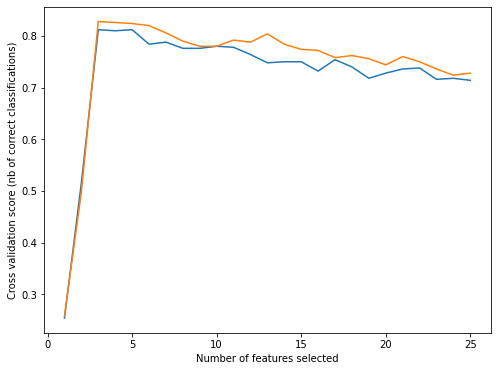

In [35]:
# SVC classifier 선택
svc = SVC(kernel="linear")
# REFCV로 Feature들을 반복적으로 제거해가면서 학습/평가 수행.
# step=1 : 처음에 컬럼 25개로 모두 학습하고, 다음에 1개(step)의 피처 제외하고 24개의 피처로 학습
# verbose=2 : 자세한 설명
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy', verbose=2)
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(8,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [31]:
## 그래프의 y축인 grid_scores_ 확인
print(rfecv.grid_scores_[:3])

[[0.254 0.258]
 [0.516 0.498]
 [0.812 0.828]]


In [32]:
print(rfecv.cv_results_['split0_test_score'][:3])
print(rfecv.cv_results_['split1_test_score'][:3])

[0.254 0.516 0.812]
[0.258 0.498 0.828]


**샘플 개수를 1000개에서 10,000개로 늘렸을 때** -> 데이터가 많아지니, 피처임포턴스가 낮은 피처가 없어진다고 성능이 향상되지 않음

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


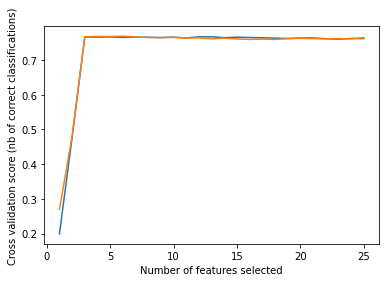

In [33]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=10000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# SVC classifier 선택
svc = SVC(kernel="linear")
# REFCV로 Feature들을 반복적으로 제거해가면서 학습/평가 수행.  
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy', verbose=2)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(8,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### SelectFromModel

In [57]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
## 당뇨 데이터 설명
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

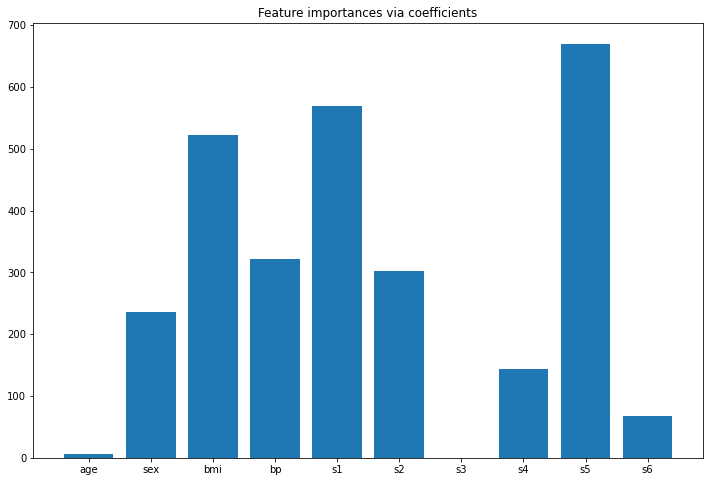

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)
feature_names = np.array(diabetes.feature_names)
plt.figure(figsize=(12,8))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [59]:
# importance와 feature_names 보기
pd.DataFrame(data=importance.reshape(1,-1), columns=feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,6.494693,235.99308,521.744369,321.060777,569.438134,302.453193,0.0,143.698515,669.922675,66.835511


In [62]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01 # 상위 3번쨰(bmi)에서 0.01더한거를 기준 -> s1, s5만 보겠다.
print('threshold:', threshold)

sfm = SelectFromModel(lasso, threshold=threshold).fit(X, y)
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")

threshold: 521.7543692954391
Features selected by SelectFromModel: ['s1' 's5']


In [63]:
## threshold에 문자열로 '1.5 * median' 넣으면 중앙값 * 1.5를 기준으로 그보다 feature importance가 높은 피처 추출
sfm = SelectFromModel(lasso, threshold='1.5 * median').fit(X, y)
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")

Features selected by SelectFromModel: ['bmi' 's1' 's5']


### Permutation Importance
<img src=https://blog.kakaocdn.net/dn/qDbU0/btrCZSEllEu/o4H6c6oSGaEZdSYPBKzI7K/img.png width=1200>

    학습 모델은 그대로 두고, 테스트 데이터 예측에서 특정 피처의 값을 랜덤으로 바꿔버리는 경우 성능이 얼마나 낮아지는지를 본다.
    -> 특정 피처가 결과에 얼마나 영향 미치는지를 보기 위한 것.
    
https://scikit-learn.org/stable/modules/permutation_importance.html

<img src=https://blog.kakaocdn.net/dn/ZRCqj/btrC3L4YTn7/Og4SWKdK8HKcZlrQe4UJmk/img.png width=1200>

R2 Score(결정계수): 회귀 모델의 성능 지표
-> 변수간 영향을 주는 정도 or 인과관계의 정도를 수치화한 것.
- R2 ⇢ 1, 좋은 회귀 모델
- R2 ⇢ 0, 나쁜 모델
- R2 ⇢ 음수, 랜덤 데이터 이용한 경우(혹은 쓰레기모델)

In [9]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state=0)

#학습, 예측, R2 Score 평가 
model = Ridge(alpha=1e-2).fit(X_train, y_train)
y_pred = model.predict(X_val)
print('r2 score:', r2_score(y_val, y_pred))

r2 score: 0.3566675322939421


In [66]:
from sklearn.inspection import permutation_importance
# n_repeats : Number of times to permute a feature. (한 피처에 대해 몇번 셔플링 할건지)
# validation 세트에 대해 permutation_importance 구하기
r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0)

# 가장 평균 permutation importance가 높은 순으로 내림차순 정렬 후 평균 permutation importance값과 표준 편차 출력
## ex) s5 0.2042  +/-  0.04964  =>  s5의 Permutation Feature Importance가 0.2042이고 표준편차가 0.049
for i in r.importances_mean.argsort()[::-1]: # argsort()[::-1] - 내림차순 정렬
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]}\tPermutation Importance : {np.round(r.importances_mean[i],4)} ± {np.round(r.importances_std[i], 5)}")

s5	Permutation Importance : 0.2042 ± 0.04964
bmi	Permutation Importance : 0.1758 ± 0.0484
bp	Permutation Importance : 0.0884 ± 0.03284
sex	Permutation Importance : 0.0559 ± 0.02319


In [64]:
rsdaf

{'importances_mean': array([-0.00199237,  0.05587285,  0.17579633,  0.08836144,  0.04219777,
         0.00203309,  0.00203936,  0.00318738,  0.20422681,  0.00278711]),
 'importances_std': array([0.00364617, 0.02318962, 0.04840405, 0.03283812, 0.03140805,
        0.00261856, 0.01309411, 0.00840227, 0.04964242, 0.00315837]),
 'importances': array([[-4.09540163e-03,  2.17350997e-03, -1.66358297e-03,
         -2.05054036e-03,  4.89593014e-03,  3.56102837e-03,
          3.22810661e-03,  1.24555824e-03, -1.91434047e-03,
         -4.91810485e-03,  6.07370963e-04, -6.42118451e-03,
         -3.43004107e-03, -1.95750559e-03,  3.18511101e-03,
         -7.34538220e-03, -2.81039602e-04, -1.21119575e-03,
         -3.96148739e-03, -6.65719815e-04, -1.06742403e-02,
         -3.22537483e-03, -5.08641484e-03, -5.53070163e-03,
          2.34598521e-03, -2.97806845e-03, -8.33552461e-03,
         -1.51641997e-03, -1.92928464e-03, -1.82214287e-03],
        [ 2.51745371e-02,  4.43993865e-02,  6.82589983e-02,

In [17]:
r.importances_mean.argsort()[::-1]

array([8, 2, 3, 1, 4, 7, 9, 6, 5, 0])

In [11]:
# 피처별 importance
r.importances_mean

array([-0.00199237,  0.05587285,  0.17579633,  0.08836144,  0.04219777,
        0.00203309,  0.00203936,  0.00318738,  0.20422681,  0.00278711])

#### Permutation Importance vs Random Forest Feature Importance

**Permutation Importance와 Feature Importance의 차이 예제**<<br>
https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py
<br>

<img src=https://blog.kakaocdn.net/dn/qveRe/btrC0NcnZHm/58ACnG9PqNtlbmLp3Lxzk1/img.png width=1200>

Feature importance의 참의미는 Feature importance for making optimal tree structure.<br>
즉, **최적 트리 구조를 만들기 위한 Feature의 중요도라는 의미가 강하다.**<br>

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

#### Target값과 상관없는 2개의 노이즈 컬럼(피처)를 생성해서 Feature importance와 Permutation importance확인

In [68]:
# titanic 데이터 세트 로딩. 
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

rng = np.random.RandomState(seed=42)
## 노이즈 컬럼(피처) 2개 생성
# 3가지 값으로 category값 random 설정. 
X['random_cat'] = rng.randint(3, size=X.shape[0])
# X건수만큼 고유한 random 값 설정. 
X['random_num'] = rng.randn(X.shape[0])

# 피처 종류 구분
categorical_columns = ['pclass', 'sex', 'embarked', 'random_cat']
numerical_columns = ['age', 'sibsp', 'parch', 'fare', 'random_num']
X = X[categorical_columns + numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, stratify=y, random_state=42)

# Null 값 처리, category 값 encoding 
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])
preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])
# 데이터 전처리 후 RandomForest로 학습 
rf = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex', 'embarked',
                                                   'random_cat']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare', 'random_num'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [70]:
print(f"RF train accuracy: {rf.score(X_train, y_train):.2%}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.2%}")

RF train accuracy: 100.00%
RF test accuracy: 81.71%


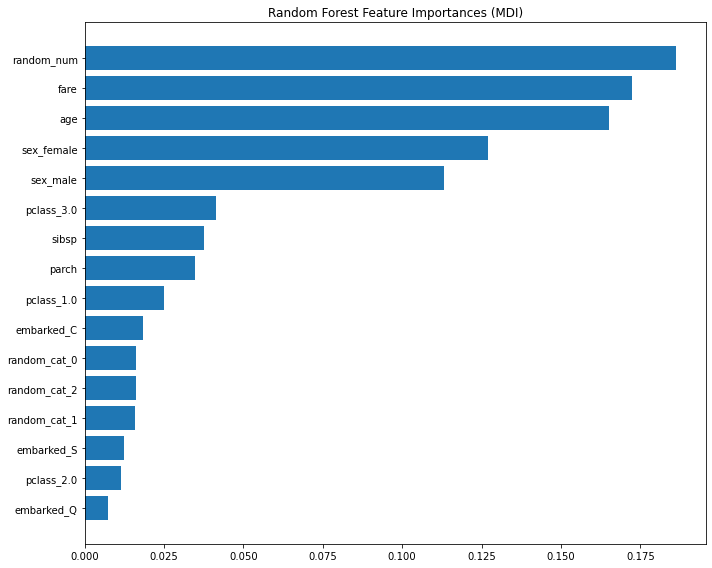

In [77]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importances = (
    rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

**-> random_num은 랜덤한 수인데 피처 임포턴스에선 높게 나올 수 있다.**

##### 검증 데이터 세트로 permutation importance 수행
**-> Feature Importance 보다 Permutation Importance가 성능과 더 연관이 높다**  

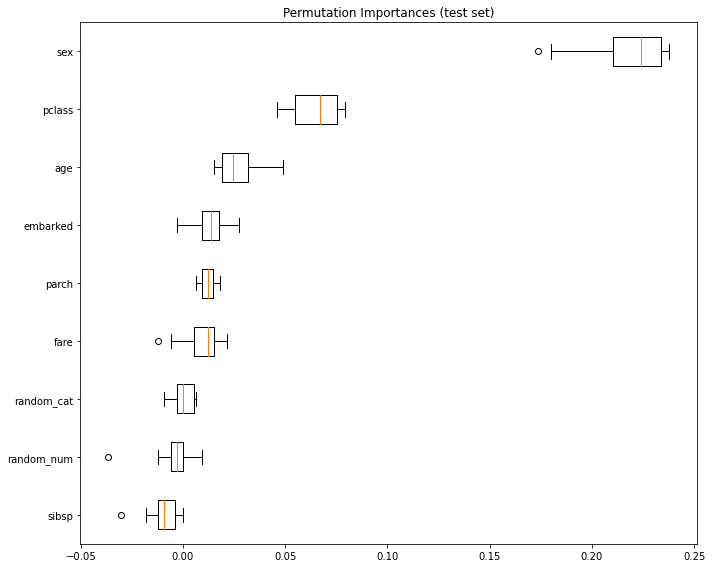

In [80]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()